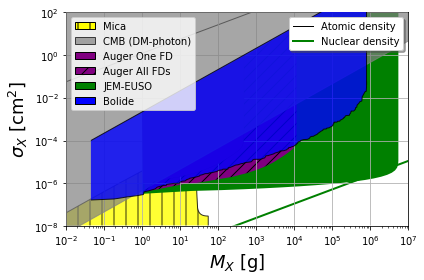

In [3]:
#Python script to make a constraint plot for Macro Dark Matter

from scipy.interpolate import interp1d
import io
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

from pylab import *

pi=np.pi
#matplotlib.pyplot.clf() #clear the plot
# file = open("mica_constraint.txt", 'r')
# data = file.read()
# cob = data.split()
# cob[0] = np.float(1.9952623149688828e-10)
# print(len(cob))
micalines = np.loadtxt("mica_constraint.txt",delimiter = ",",skiprows=1)
#OurLine = np.loadtxt("OurLine.txt",delimiter = ",")

augersmall=[[1.0309949387644994, 1e-06], [9.89700668229302, 2e-06], [23.89436999160289, 3e-06], 
            [39.28949373802332, 4e-06], [54.74704200738964, 4.9999999999999996e-06], 
            [69.80261694461089, 6e-06], [84.30081952095443, 7e-06], [98.20516751831019, 8e-06], 
            [111.52697742721182, 9e-06], [124.29638395935322, 1e-05], [229.00997167046378, 2e-05], 
            [312.9948396858257, 3.0000000000000004e-05], [383.372341329184, 4e-05], [414.158302175381, 5e-05], 
            [444.86638730960914, 6.000000000000001e-05], [444.86638730960914, 7.000000000000001e-05], 
            [472.42485634107396, 8e-05], [472.42485634107396, 9e-05], [472.42485634107396, 0.0001], 
            [480.0115536, 0.0002], [480.0115536, 0.00030000000000000003], [480.0115536, 0.0004], 
            [480.02,0.882],[1,0.002],
            [1.060625105880066, 1e-06]]

augerbig=[[14, 9.5e-07], [24.650418627900166, 1e-06], [236.6309946914056, 2e-06], 
          [571.2988502628216, 3e-06], [939.3862490548685, 4e-06], [1308.966177601821, 4.9999999999999996e-06], 
          [1668.9351851422146, 6e-06], [2015.577781940261, 7e-06], [2348.0217018818657, 8e-06], 
          [2666.537514897651, 9e-06], [2971.8457223504793, 1e-05], [5475.479519235515, 2e-05], 
          [7488.588484797514, 3.0000000000000004e-05], [9172.412246634243, 4e-05], 
          [9912.551980873777, 5e-05], [10647.525754252905, 6.000000000000001e-05], 
          [10647.525754252905, 7.000000000000001e-05], [11308.92901100806, 8e-05], 
          [11308.92901100806, 9e-05], [11308.92901100806, 0.0001], [11520.277286399998, 0.0002], 
          [11520.277286399998, 0.0006000000000000001],
          [11520, 21],[1.1,0.002],[1.176219209513907, 4e-07]]

JEM = [[5500010.535777831, 1.8923745940383394e-05], [5499470.134832158, 1.1299509456138018e-05], 
       [5399219.515059308, 7.502006278149246e-06], [5083417.986504935, 5.340783766377735e-06], 
       [4493264.409916191, 3.994859442491453e-06], [3685334.116545996, 3.1003189210718823e-06], 
       [2787731.573761691, 2.4757639550795837e-06], [1939235.9798781779, 2.022545331646006e-06], 
       [1239115.3509449656, 1.683275646897753e-06], [727065.6569064545, 1.422726997078772e-06], 
       [391815.88356178754, 1.218303091283315e-06], [193991.90947502453, 1.0549696328647376e-06], 
       [88276.93537542058, 9.224089351949403e-07], [36933.53027001961, 8.133495801265319e-07], 
       [14209.07715775438, 7.225475725684767e-07], [5024.262964388126, 6.461439717356806e-07], 
       [1628.5333115838018, 5.812480153864172e-07], [478.63756823718353, 5.256596094550942e-07], 
       [121.59773383862982, 4.776803718028475e-07], [19.85679553373476, 4.3598234827573353e-07],
       [1,3.2e-07],[1.31,0.002],[5500000,10991],
       [5495887.799172671, 0.0008572618882313399]]

bolidespace=[[0.045129080758488094, 1.6465238165426137e-07], [0.18051632303395237, 1.8316729085780541e-07], 
              [0.27635848599688595, 2.0480615416776463e-07], [0.40616172682639284, 2.3029050032628863e-07], 
              [0.7220652921358095, 2.605584364558859e-07], [1.087812655084508, 2.968464187580178e-07], 
              [1.1054339439875438, 3.4080902045445937e-07], [1.1282270189622023, 3.9469810795629847e-07], 
              [1.6246469073055714, 4.616373205421736e-07], [2.2113249571659166, 5.460539214549374e-07], 
              [2.4872263739719735, 6.543791618127862e-07], [2.888261168543238, 7.104755922613202e-07], 
              [3.701212071781368, 7.903674890555873e-07], [4.351250620338032, 7.962242615212616e-07], 
              [4.421735775950175, 8.837392585468254e-07], [6.908962149922148, 9.864360484668283e-07], 
              [9.790313895760573, 9.937042997351693e-07], [9.948905495887894, 1.1243105480757437e-06], 
              [11.418779464518469, 1.2488637738895263e-06], [13.541565813847411, 1.2808933163238959e-06], 
              [14.804848287125472, 1.4705920936134585e-06], [17.405002481352128, 1.6236598779543572e-06], 
              [17.6869431038007, 1.70312369124128e-06], [27.1953163771127, 1.991966623421394e-06], 
              [32.2933571767145, 2.182425264057024e-06], [33.31090864603231, 2.356224546250117e-06], 
              [39.16125558304229, 2.5306834057989545e-06], [45.675117858073875, 2.8152548952030413e-06], 
              [53.30282009914089, 2.8236483303876515e-06], [59.21939314850189, 3.0623873387369065e-06], 
              [69.62000992540851, 3.1478411095576786e-06], [83.93984152277184, 3.435710422731743e-06], 
              [92.5303017945342, 3.539531841772142e-06], [102.76901518066623, 4.00474566328732e-06], 
              [129.173428706858, 4.256474936597116e-06], [133.24363458412924, 4.552269381104838e-06], 
              [181.35939151728704, 4.562486727942941e-06], [182.7004714322955, 5.238185587996778e-06], 
              [200.62939858050132, 5.38885147298387e-06], [236.87757259400755, 6.066453106051367e-06], 
              [285.46948661296176, 7.006097949089151e-06], [290.6402145904305, 7.095299168199648e-06], 
              [335.7593660910874, 7.34103252127175e-06], [411.0760607226649, 8.333449161084987e-06], 
              [440.8907033523285, 8.392770173219605e-06], [516.693714827432, 9.270532809797853e-06], 
              [559.520193761405, 9.417172508945923e-06], [730.801885729182, 1.0057713525077258e-05], 
              [755.4585737049466, 1.0365727215645342e-05], [802.5175943220053, 1.1655550666614258e-05], 
              [807.3339294178625, 1.2237852290272256e-05], [890.490644458608, 1.3187482998310588e-05], 
              [1162.560858361722, 1.3214211883016277e-05], [1343.0374643643495, 1.3397669289971969e-05], 
              [1582.3745016590105, 1.5024104203755156e-05], [1652.4219475146692, 1.5161380076352441e-05], 
              [1763.562813409314, 1.7249156174127565e-05], [1805.664587224512, 1.9194856441992354e-05], 
              [2066.774859309728, 1.9643058012151304e-05], [2098.496038069296, 1.9976611231393742e-05], 
              [2816.1712521476493, 2.336456419850476e-05], [3021.8342948197865, 2.4955418612946035e-05], 
              [3210.070377288021, 2.6286087398905274e-05], [3561.962577834432, 2.763708941186787e-05], 
              [3968.0163301709563, 2.9241917837660174e-05], [4113.05223461582, 3.167658053870109e-05], 
              [4407.354499723132, 3.2696474926138415e-05], [5015.734964512533, 3.311968780683061e-05], 
              [5372.149857457398, 3.354356216810042e-05], [6335.753576731116, 3.676494781244956e-05], 
              [6609.687790058677, 4.0298806112277955e-05], [7054.251253637256, 4.1597101507971186e-05], 
              [7222.658348898048, 4.7068452593316825e-05], [8014.415800127473, 4.739033124895794e-05], 
              [8375.759355786355, 4.992587764579795e-05], [9830.840530444566, 5.4408782964417935e-05], 
              [10211.964567991345, 5.7810988994387156e-05], [11022.267583808212, 6.301195802747316e-05], 
              [11264.685008590597, 6.320796981049773e-05], [11553.222696602124, 6.996772512941378e-05], 
              [12270.95344331661, 7.369853282686463e-05], [12498.795760982177, 8.0687809751753e-05], 
              [12500.023944949618, 8.217729322760696e-05], [12840.281509152084, 8.717530204949789e-05], 
              [14247.850311337728, 8.9761030900315e-05], [14871.797527632023, 0.00010036514405346956], 
              [15872.065320683825, 0.0001044689889488039], [17629.417998892528, 0.0001104577401381062], 
              [21603.644464264096, 0.0001128306131764482], [22262.2661114652, 0.00011285373397745006], 
              [25343.014306924462, 0.00012711398594540167], [25345.54126932884, 0.0001276865195555623], 
              [26438.751160234708, 0.00014546942547439463], [28217.005014549024, 0.00015499471639895265], 
              [32057.66320050989, 0.0001574805291178655], [33503.03742314542, 0.0001670132744381048], 
              [39666.190497508185, 0.0001934215923522321], [40847.85827196538, 0.00019937605505591027], 
              [41310.54868786673, 0.00020592024851306988], [43634.04157847179, 0.00022622511694018912], 
              [45058.74003436239, 0.0002304011947708086], [46212.8907864085, 0.0002430712541689555], 
              [49083.81377326644, 0.00025921073858271463], [49995.18304392871, 0.0002675934261374491], 
              [50000.095779798474, 0.00027040424598913983], [56991.40124535091, 0.00030234903531254563], 
              [57021.78219058004, 0.0003206781510438915], [59487.19011052809, 0.0003399707928613402], 
              [70404.28130369123, 0.0003484153745983614], [70517.67199557011, 0.00037154713883427373], 
              [75381.8342020772, 0.0003846544173689766], [80968.67542821879, 0.00039018926472780157], 
              [91907.6811119221, 0.00043822525115115406], [101372.05722769785, 0.00048340244709058246], 
              [101382.16507731537, 0.000488897764044313], [103979.00426941912, 0.0005031258898392901], 
              [105755.00464093883, 0.0005826806946558871], [110183.8624930783, 0.0006120050106839521], 
              [110438.58098984949, 0.0006780879497962695], [112489.16184883959, 0.0006815009983335892], 
              [112500.21550454656, 0.0007222530453451225], [134012.14969258168, 0.0007267514117490765], 
              [137992.3913552348, 0.0007956736368929713], [158393.83941827787, 0.0008034692987767171], 
              [158664.76199003274, 0.0008061226336260089], [163391.43308786151, 0.0008983888788423264], 
              [180234.96013744955, 0.000966039859039884], [184851.563145634, 0.0010101767949155514], 
              [196335.25509306576, 0.001069496309342301], [199980.73217571483, 0.001142948084503196], 
              [200000.3831191939, 0.0011719661781604176], [209393.9838946589, 0.001175441423338285], 
              [215960.37048643344, 0.001302126503083128], [228087.12876232015, 0.0014562452425485152], 
              [255299.1141997836, 0.001494969890087532], [282070.68798228045, 0.001500721243698971], 
              [288830.56741505314, 0.0017313561310154091], [301527.3368083088, 0.0018436592338088754], 
              [306773.83608291525, 0.0020249871714984585], [310451.92525982467, 0.00213888376444701], 
              [312469.8940245544, 0.0022308371252874083], [312500.5986237404, 0.0023952833462294936], 
              [367630.7244476884, 0.0023969592113577817], [405488.2289107914, 0.0028704555481140924], 
              [410412.2084335314, 0.0032218473898438463], [415916.0170776765, 0.003492663706917713], 
              [441754.32395939797, 0.0035974689798389365], [449956.64739535836, 0.004327033917671465], 
              [450000.86201818625, 0.0045209083749602995], [500386.26383157587, 0.005478181699229422], 
              [536048.5987703267, 0.0065655205222364555], [566107.9121335042, 0.006720375476278147], 
              [601276.7187225139, 0.007122237040698609], [612440.9922881267, 0.009573279641427668], 
              [612501.1733025312, 0.010837340850541121], [653565.7323514461, 0.013433261998441503], 
              [739406.252582536, 0.019778567698416908], [785341.020372263, 0.019968678197672653], 
              [799922.9287028593, 0.03220167871971308], [800001.5324767756, 0.05876931355616771],
              [800001.5324767756, 0.04],[800001,1600], [0.045129080758488094,10**-4]]
       

def FemtoTop(M):
    f = 10.**(0)*M
    return f

def KeplerTop(M):
    f = 10.**(-6)*M
    return f

def LMCTop(M):
    f = 10.**(-4)*M
    return f

#CMB constraint (Boehm)
def CMB(M):
    f = 4.5*10**-7 * M
    return f

#LSS constraint (Boehm)
def LSS(M):
    f = 6*10**-10 * M
    return f

def microupper(M):
    f = 0.002*M
    return f

#Nuclear Density
def nuc(M):
    f = pi*(3/(4*pi*3.6*10**14))**(2./3) *pow(M,2./3)
    return f

#Black Holes
def BH(M):
    f = pi*(3*10**5)**2 *(M/(2.*10**33))**2
    return f

#Atomic Density
def atom(M):
    f = pi*(3/(4*pi*1*10**0))**(2./3) *pow(M,2./3)
    return f

#Seismological Constraint
def seissolid(M):
    f = M / (1.02 * 10 ** 9)
    return f

#Empty
def empty(M):
    f = 0 * M
    return f


M1=np.logspace(-2,7)
MMica = np.logspace(-10, 2.204)# for M_max=160g
MMica1 = np.logspace(-12,1.43,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g  1.43 for M_max=27.5g
MMica2 = np.logspace(1.43,1.74,num=1000)
Mfemtolens = np.logspace(17,20.3)
MKepler = np.logspace(24.6,26.3)
MLMC = np.logspace(26.08,34.8)
Mmicro = np.logspace(20,24.6)

#MMica = np.logspace(-12,1.74,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g
#MSkylab = np.logspace(-18,-6.4,num=1000)
#McausalTE = np.logspace(38.5,log(M1.max()))#total energy
#McausalTM = np.logspace(32,log(M1.max()))#matter

#Define Plot
fig = plt.figure()
ax = fig.add_subplot(111)

#X-axis
ax.set_xlabel('$M_\t{X}$ [g]',fontsize=18)
#xmin=-2
#xmax=40
ax.set_xlim([M1.min(),M1.max()])

#Y-axis
ymin=10**-8#nuc(M1).min()#10**(-15)
ymax=float(10**2)#nuc(M1).max()#10**15
ax.set_ylim([ymin,ymax])
ax.set_ylabel('$\sigma_\t{X}$ [cm$^{2}$]',fontsize=18)

#Make Plot
#ax.loglog(M1, SIDM(M1), 'k', markersize=2, color='b')
ax.loglog(M1, atom(M1), 'k', markersize=4, color='k',lw=1,label='Atomic density',zorder=0)
ax.loglog(M1, nuc(M1), 'k', markersize=4, color='g',lw=2,label='Nuclear density',zorder=0)
#ax.loglog(M1, BH(M1), 'k', markersize=4, color='m',lw=5,label='Black holes',zorder=0)
#ax.loglog(M1, empty(M1), 'k', markersize=1, color='r',lw=1,label = 'Full Pass',zorder = 0)

line3 = plt.Polygon(micalines, closed=None, fill=True, facecolor='yellow', edgecolor='black',alpha=0.8, hatch="|",lw=1,zorder=0)# edgecolor='r'
plt.gca().add_line(line3)

#line4 = plt.Polygon(OurLine, closed=True, fill=True, facecolor = 'blue', edgecolor='black',alpha=1,lw=0.1,hatch="|",zorder=0)# edgecolor='r' ls='--'
#plt.gca().add_line(line4)

#line5 = plt.Polygon([[OurLine[0][0],OurLine[0][1]],[OurLine[0][0],nuc(2 * 10 ** 4)]], closed = None, fill = False, edgecolor = 'black', alpha = 1, lw = 1, ls = '--')
#plt.gca().add_line(line5)

#line6 = plt.Polygon([[10 ** (-9),9.8 * 10 **(-19)],[OurLine[10000][0],OurLine[10000][1]]], closed = None, fill = False, edgecolor = 'red', alpha = 1, lw = 1)
#plt.gca().add_line(line6)

#line8 = plt.Polygon([[OurLine[0][0],OurLine[0][1]],[OurLine[10000][0],OurLine[10000][1]],[OurLine[10000][0],atom(8)],[OurLine[0][0],atom(2 * 10 ** 4)]], closed = True, fill = True, facecolor = 'blue', alpha = 1, lw = 0.1,hatch = "|||,---")
#plt.gca().add_line(line8)

#line7 = plt.Polygon([[OurLine[10000][0],OurLine[10000][1]],[OurLine[0][0],OurLine[0][1]]], closed = None, fill = False, edgecolor = 'red', alpha = 1, lw = 1,ls = '--')
#plt.gca().add_line(line7)

#plt.fill_between(M1, SIDM(M1),ymax,where=None, color='0.5',edgecolor='black',hatch="\\",alpha=.6,zorder=4)#SIDM 
plt.fill_between(M1, CMB(M1),ymax,where=None, color='grey',edgecolor='black',hatch="",alpha=.7,zorder=3)#SIDM ,alpha=.5

#Lensing
#plt.fill_between(Mfemtolens, ymin, FemtoTop(Mfemtolens), where=None,facecolor='brown',edgecolor='black', hatch="--",alpha=1,zorder=1) #Femtolensing
plt.fill_between(MKepler, ymin, KeplerTop(MKepler), where=None,facecolor='brown',edgecolor='black', hatch="//",alpha=1,zorder=2) #Microlensing
plt.fill_between(MLMC, ymin, LMCTop(MLMC), where=None,facecolor='brown',edgecolor='black',hatch="//",alpha=1,zorder=2) #Microlensing,LMC
plt.fill_between(Mmicro,2*10**-8,microupper(Mmicro), where=None,facecolor='pink',edgecolor='black',hatch="",alpha=1,zorder=1)

#Black holes
plt.fill_between(M1, ymin, BH(M1), where=None,color='1', edgecolor='', hatch="+",alpha=1,zorder=2) #BH ,label='BH',

#Local constraints
#plt.fill_between(MSkylab, SkylabBottom(MSkylab), SkylabTop(MSkylab), where=SkylabBottom(MSkylab)< SkylabTop(MSkylab),color='g',edgecolor='w', hatch="+",lw='0',alpha=1,zorder=1)#MicaEl #,alpha=0.9 # ,edgecolor='black'
#linesky = plt.Polygon(skylablines, closed=None, fill=True, color='g',edgecolor='black',alpha=0.7, hatch="+",lw=0.0,zorder=0)# edgecolor='r'
#plt.gca().add_line(linesky)
#plt.fill_between(MMica1, MicaBottomEl(MMica1), MicaTopEl(MMica1), where=MicaBottomEl(MMica1) < MicaTopEl(MMica1),color='yellow',edgecolor='black',alpha=1, hatch="|",lw='0.0',zorder=1)#MicaEl  # ,edgecolor='black'  , alpha=0.7
#plt.fill_between(MMica2, MicaBottomEl(MMica2), MicaTopALL(MMica2), where=MicaBottomEl(MMica2) < MicaTopEl(MMica2),color='yellow',edgecolor='black',alpha=1, hatch="|",lw='0.0',zorder=1)#MicaEl  # ,edgecolor='black'  , alpha=0.

line8 = plt.Polygon(augersmall, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.1,hatch = "",zorder=2)
plt.gca().add_line(line8)

line9 = plt.Polygon(augerbig, closed = True, fill = True, facecolor = 'purple', alpha = 1, lw = 0.1,hatch = "//",zorder=1)
plt.gca().add_line(line9)

lineh = plt.Polygon(JEM, closed = True, fill = True, facecolor = 'green', alpha = 1, lw = 0.1,hatch = "",zorder=0)
plt.gca().add_line(lineh)

linebolide = plt.Polygon(bolidespace, closed=None, fill=True, facecolor='blue', edgecolor='black',alpha=0.8, hatch="",lw=1,zorder=5)# edgecolor='r'
plt.gca().add_line(linebolide)

#BBN
#plt.fill_between(M1, BBN(M1),ymax,where=None, color='grey',edgecolor='black',hatch="",alpha=.7,zorder=3)#SIDM ,alpha=.5
#CMB and LSS
#plt.fill_between(M1, Dvorkin(M1),ymax,where=None, color='0.5',edgecolor='black',hatch="",alpha=.6,zorder=3)#SIDM ,alpha=.5



legBoehm_CMB = Rectangle((0, 0), 1, 1, fc='grey',edgecolor='black', hatch="",alpha=.7)
legMicaEl = Rectangle((0, 0), 1, 1, fc="yellow",edgecolor='black', hatch="|",alpha=1)
#legfemto = Rectangle((0, 0), 1, 1, fc="brown",edgecolor='black',alpha=1, hatch="--")
legmicro = Rectangle((0, 0), 1, 1, fc="brown",edgecolor='black', alpha=1,hatch="//")
#leglunar = Rectangle((0, 0), 1, 1,edgecolor='blue', alpha=1)
legM31 = Rectangle((0, 0), 1, 1,fc="pink", edgecolor='black', alpha=1, hatch="")

legauger = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="")
legaugerfull = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="//")
legJEM = Rectangle((0, 0), 1, 1,fc="green", edgecolor='black', alpha=1, hatch="")
legbolide=Rectangle((0, 0), 1, 1,fc="blue", edgecolor='black', alpha=1, hatch="")
#legMicaInel = Rectangle((0, 0), 1, 1, fc="blue",edgecolor='black', hatch="\\",alpha=0.4)
#legSkylab = Rectangle((0, 0), 1, 1, fc="g",edgecolor='w', hatch="+",alpha=0.7)
#legMica = Rectangle((0, 0), 1, 1, fc="y",edgecolor='black', hatch="++")
#legSIDM = Rectangle((0, 0), 1, 1, fc='grey',edgecolor='black', hatch="\\",alpha=.6)
#legDvorkin = Rectangle((0, 0), 1, 1, fc='grey',edgecolor='black', hatch="",alpha=.4)
#legBBN = Rectangle((0, 0), 1, 1, fc="b",edgecolor='black', hatch="**"
#legBBNcausalT = Rectangle((0, 0), 1, 1, fc="g",edgecolor='black', hatch="")
#legBBNcausalM = Rectangle((0, 0), 1, 1, fc="b",edgecolor='black', hatch="")
# legend([p], ["Red Rectangle"])
#Legend, grid
# leg = ax.legend([thing],loc='best', shadow=True)('Nuclear Density',),

leg = ax.legend(loc='upper right', shadow=True)
leg2 = legend(([legMicaEl, legBoehm_CMB,legauger,legaugerfull,legJEM,legbolide]),[ "Mica", "CMB (DM-photon)","Auger One FD","Auger All FDs","JEM-EUSO","Bolide"],loc='upper left')
gca().add_artist(leg) #Needto add this back otherwise leg2 removes it  ,legBBNcausalT,legBBNcausalM   ,"Causality (T)","Causality (M)"

#leg2 = legend(([legSIDM,legDvorkin, legMicaEl,legMicaInel, legSkylab, legfemto,legmicro]),["SIDM","LSS","Mica (el)","Mica (inel)","Skylab","Femtolens","Microlens"],loc='4')
#leg = ax.legend([p]),'best', shadow=True)
#Title
#ax.set_title('Large $V(R)$ MDM Constraints')

ax.grid(True)
plt.tight_layout()
plt.savefig('new.pdf')

plt.show()
